# 3th_hometask

Вот и подъехала к вам домашка по линейной регрессии. В буквальном смысле подъехала, потому что вы будете предсказывать стоимость автомобиля :) 

Здесь вам нужно помнить всё, что обсуждали на прошлых занятиях, и подготовить данные так, чтобы максимально классно предсказывалась цена на автомобиль.

Любые эксперименты идут в плюс. Покажите ваши аналитические способности.
Подробней описывайте свои наблюдения, и что можно сделать с данными.

Если возникнет идея взять сторонний датасет для обогащения данных, то это пойдёт вам в плюс :)


Описание данных:

Car_ID
Unique id of each observation (Interger)

Symboling 
Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 

carCompany
Name of car company (Categorical)

fueltype
Car fuel type i.e gas or diesel (Categorical)

aspiration
Aspiration used in a car (Categorical)

doornumber
Number of doors in a car (Categorical)

carbody
body of car (Categorical)

drivewheel
type of drive wheel (Categorical)

enginelocation
Location of car engine (Categorical)

wheelbase
Weelbase of car (Numeric)

carlength
Length of car (Numeric)

carwidth
Width of car (Numeric)

carheight
height of car (Numeric)

curbweight
The weight of a car without occupants or baggage. (Numeric)

enginetype
Type of engine. (Categorical)

cylindernumber
cylinder placed in the car (Categorical)

enginesize
Size of car (Numeric)

fuelsystem
Fuel system of car (Categorical)

boreratio
Boreratio of car (Numeric)

stroke
Stroke or volume inside the engine (Numeric)

compressionratio
compression ratio of car (Numeric)

horsepower
Horsepower (Numeric)

peakrpm
car peak rpm (Numeric)

citympg
Mileage in city (Numeric)

highwaympg
Mileage on highway (Numeric)

price(Dependent variable)
Price of car (Numeric)


### Import Section

In [1]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

import seaborn as sn

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Function "Reduce Memory Usage"

In [2]:
def reduce_memory_usage(df):
    
    # СДЕЛАТЬ ПРОВЕРКУ type(df) == pd.DataFrame
    
    initial_memory_usage = df.memory_usage().sum() / 1024 / 1024
    print(f'Initial memory usage of dataframe:\t{initial_memory_usage:.3} Mb')
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != 'object':
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            
            # Можно было бы сделать оптимизацию вплоть до типа "float16", однако данный тип данных,
            # как сообщается от сообщества аналитиков данных, плохо поддерживается некоторыми библиотеками
            
            if str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float64).min and c_max < np.finfo(np.float64).max:
                    df[col] = df[col].astype(np.float64)
        
        else:
            df[col] = df[col].astype('category')
    
    final_memory_usage = df.memory_usage().sum() / 1024 / 1024
    print(f'Final memory usage of dataframe:\t{final_memory_usage:.3} Mb')
    
    comparison = np.round(100 * (initial_memory_usage - final_memory_usage) / initial_memory_usage, 3)
    print(f'Memory usage has been decreased by:\t{comparison} %')
    
    return df

### Path Section

In [3]:
PATH_DATA_PART_1 = r'cars.csv'
PATH_DATA_PART_2 = r'CarPrice_Assignment.csv'

PATH_DATA_PREPROCESSED = r'cars_[reprocessed.csv'

## Exploratory Data Analysis

In [4]:
df_data_part_1 = pd.read_csv(PATH_DATA_PART_1, sep='\t')
df_data_part_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    float64
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    float64
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    float64
 9   Cruise    804 non-null    float64
 10  Sound     804 non-null    float64
 11  Leather   804 non-null    float64
dtypes: float64(8), object(4)
memory usage: 75.5+ KB


In [5]:
df_data_part_1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,1.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,1.0


In [6]:
df_data_part_2 = pd.read_csv(PATH_DATA_PART_2)
df_data_part_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df_data_part_2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### К сожалению, я ограничен по времени, поэтому сосредоточусь только на одном наборе данных. Первый набор данных выглядит интереснее, так как во-первых обладает большим числом записей, что даёт больший простор для экспериментов. Во-вторых, требует меньшей предобработки данных, что позволит инвестировать свободное время в постоение модели.

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Mileage'}>,
        <AxesSubplot:title={'center':'Cylinder'}>],
       [<AxesSubplot:title={'center':'Liter'}>,
        <AxesSubplot:title={'center':'Doors'}>,
        <AxesSubplot:title={'center':'Cruise'}>],
       [<AxesSubplot:title={'center':'Sound'}>,
        <AxesSubplot:title={'center':'Leather'}>, <AxesSubplot:>]],
      dtype=object)

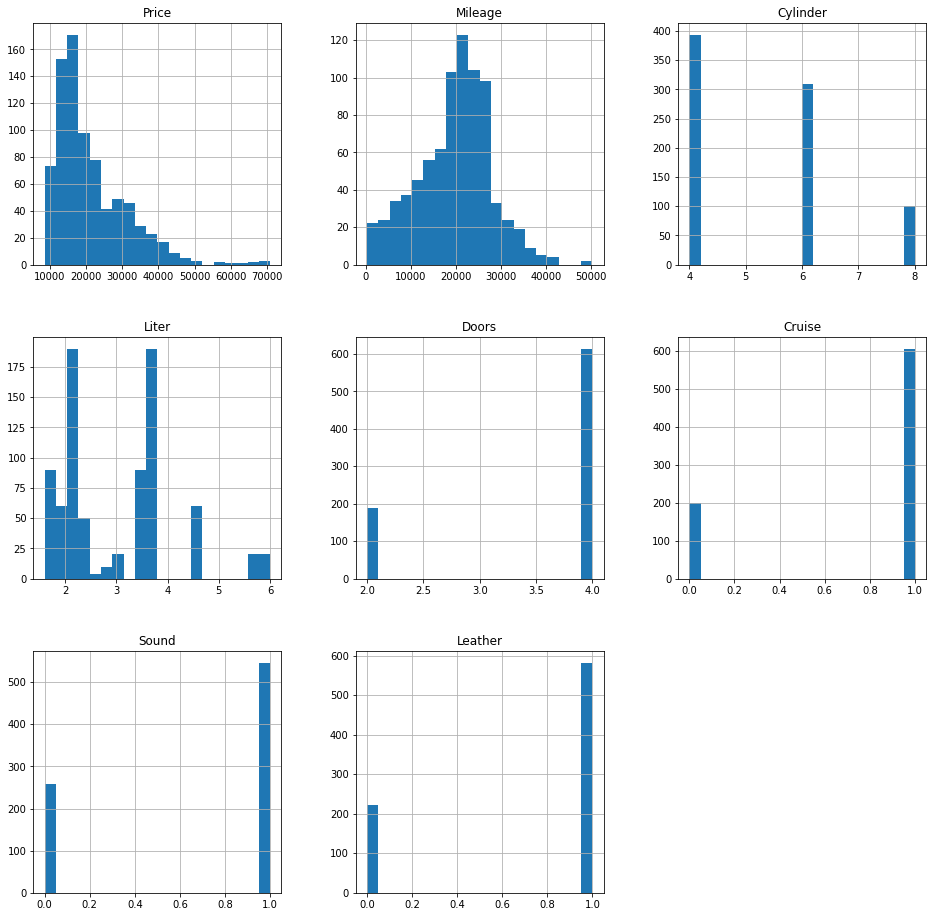

In [8]:
df_data_part_1.hist(figsize = (16, 16), bins = 20)

## Data Preprocessing

In [9]:
df_data_preprocessed = df_data_part_1.copy()

#### В целях ознакомления с LabelEncoder попробую применить его, так как в прошлой домашке не сделал этого:

In [10]:
le = LabelEncoder()
df_le_test = pd.DataFrame(le.fit_transform(df_data_preprocessed['Make']), columns=['Make'])

df_le_test.head()

,Make
0,0
1,0
2,0
3,0
4,0


##### Получился бесполезный набор данных, где каждый производитель закодирован индивидуальным числом. С точки зрения модели это выглядит так, что один производитель больше (лучше) влияет на целевую переменную - стоимость авто. Мб это и так, так как например в действительности авто марки Mercedes в среднем стоят дороже, чем авто марки Hyundai, но вряд ли LabelEncoder разбирается в подобных тонкостях. Для расстановки весов признака "Марка авто" понадобится отдельный анализ, так что нет.

array([[<AxesSubplot:title={'center':'Make'}>]], dtype=object)

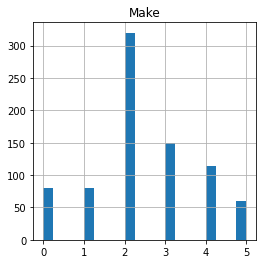

In [11]:
df_le_test.hist(figsize = (4, 4), bins = 20)

In [12]:
le.classes_

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

##### Зато можно посмотреть сколько всего производителей авто и как они распределены, интересно. Вывод - LabelEncoding позволяет графически оценить распределение категориальных признаков.

#### Продолжим обработку категориальных признаков при помощи OneHotEncoder.

In [13]:
# Проверим наличие дубликатов:
print(f'Duplicates: {df_data_preprocessed.duplicated().sum()}')

Duplicates: 0


##### На первый взгляд дубликатов нет, однако это может быть из-за признаков "Price" и "Mileage", которые имеют много знаков после запятой и делают каждое значение уникальным. Попробуем округлить каждый признак до сотен, точность целевой переменной пострадает не сильно, зато получим снижение размерности данных, исключим дубли, облегчим задачу вычисления весов.

##### На мой взгляд, вряд ли кто-то из клиентов/оценщиков авто обратит пристальное внимание на десятки долларов в стоимости авто или десятки миль в пробеге авто. При покупке авто мы мысленно округляем данные показатели до тысяч или даже до десятков тысяч.

In [14]:
df_data_preprocessed['Price_preprocessed'] = (df_data_preprocessed['Price'] / 100).apply(np.floor).astype(int) * 100
df_data_preprocessed['Mileage_preprocessed'] = (df_data_preprocessed['Mileage'] / 100).apply(np.floor).astype(int) * 100
df_data_preprocessed.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price_preprocessed,Mileage_preprocessed
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,1.0,17300,8200
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0,17500,9100
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0,16200,13100
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,0.0,16300,16300
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,1.0,16300,19800


##### Сравним, как изменились распределения признаков:

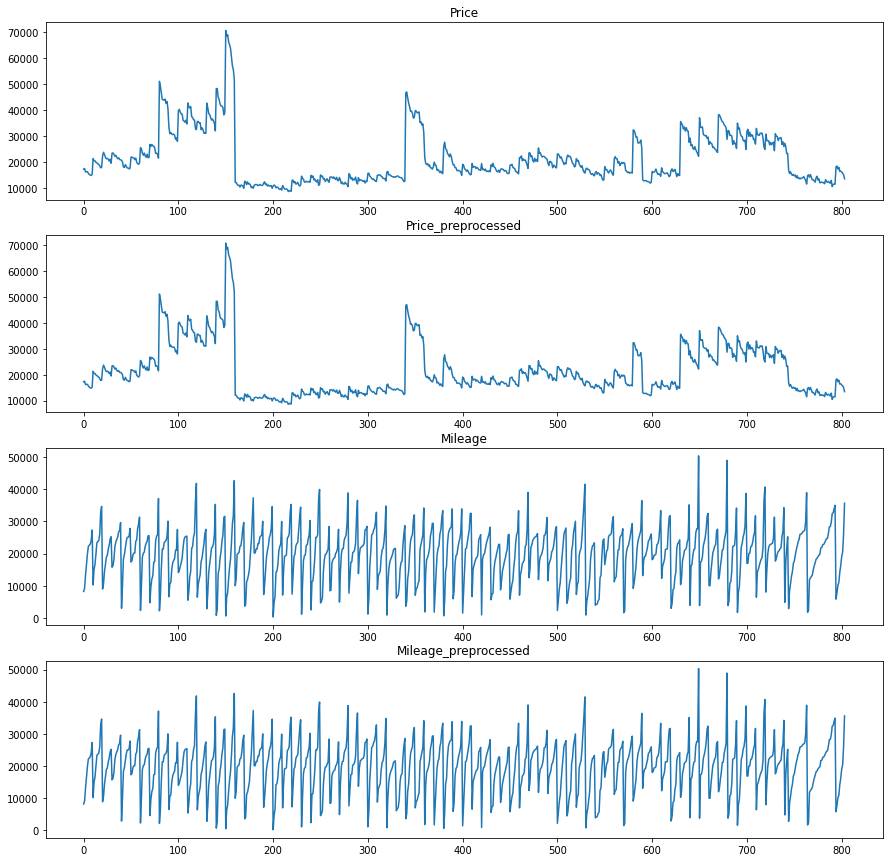

In [15]:
fig, ax = plt.subplots(nrows = 4, ncols = 1)

ax0, ax1, ax2, ax3 = ax.flatten()

ax0.plot(df_data_preprocessed['Price'])
ax0.set_title('Price')

ax1.plot(df_data_preprocessed['Price_preprocessed'])
ax1.set_title('Price_preprocessed')

ax2.plot(df_data_preprocessed['Mileage'])
ax2.set_title('Mileage')

ax3.plot(df_data_preprocessed['Mileage_preprocessed'])
ax3.set_title('Mileage_preprocessed')

fig.set_size_inches(15, 15)

##### Явного изменения признаков визуально не наблюдается, отлично!
##### Снижение информативности минимальное, зато теперь будет гораздо удобнее.

In [16]:
# Исключаем оригинальные признаки:
df_data_preprocessed = df_data_preprocessed.drop(columns=['Price', 'Mileage']).copy()
df_data_preprocessed.head(1)

,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price_preprocessed,Mileage_preprocessed
0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,1.0,17300,8200


In [17]:
# логично предположить, что кол-во цилиндров, дверей, наличие круиз-контроля, аудиоподготовки, кожанного салона
# - дискретные величины.
df_data_preprocessed['Cylinder'] = df_data_preprocessed['Cylinder'].astype(int)
df_data_preprocessed['Doors'] = df_data_preprocessed['Doors'].astype(int)
df_data_preprocessed['Cruise'] = df_data_preprocessed['Cruise'].astype(int)
df_data_preprocessed['Sound'] = df_data_preprocessed['Sound'].astype(int)
df_data_preprocessed['Leather'] = df_data_preprocessed['Leather'].astype(int)
df_data_preprocessed.head(1)

,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price_preprocessed,Mileage_preprocessed
0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,17300,8200


In [18]:
# Проверим наличие дубликатов ещё раз:
print(f'Duplicates: {df_data_preprocessed.duplicated().sum()}')

Duplicates: 1


##### Так и знал! Удаляем дубликаты, чтобы максимально похожие записи не оказывали влияния.

In [19]:
# Исключаем дубликаты:
df_data_preprocessed = df_data_preprocessed.drop_duplicates().copy()
df_data_preprocessed.shape

(803, 12)

##### Признак "Trim" - является линейнозависимым вектором от векторов "Type" и "Doors", поэтому его можно исключить.

In [20]:
df_data_preprocessed = df_data_preprocessed.drop(columns=['Trim']).copy()
df_data_preprocessed.head(1)

,Make,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price_preprocessed,Mileage_preprocessed
0,Buick,Century,Sedan,6,3.1,4,1,1,1,17300,8200


##### Признаки "Make", "Model", "Type" - категориальные, OneHotEncoder уже заждался. Однако! Не смотря на юридические нормы и патенты, у разных производителей могут быть одинаковые модели авто: Гугл подсказывает, что Ferrari California и Volkswagen California явный тому пример (это вообще разные автомобили!). Итог этого маленького исследования - названия моделей нужно рассматривать только совместно с названиями марок авто. А вот признак "Type" точно можно перевести в категориальный. Так и поступим.

In [21]:
df_data_preprocessed['Make_Model'] = df_data_preprocessed['Make'].str.cat(others=df_data_preprocessed['Model'], sep='_')
df_data_preprocessed = df_data_preprocessed.drop(columns=['Make', 'Model']).copy()
df_data_preprocessed.head(1)

,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price_preprocessed,Mileage_preprocessed,Make_Model
0,Sedan,6,3.1,4,1,1,1,17300,8200,Buick_Century


In [22]:
ohe_Make_Model = OneHotEncoder()

df_Make_Model = ohe_Make_Model.fit_transform(df_data_preprocessed[['Make_Model']])
df_Make_Model = pd.DataFrame(df_Make_Model.toarray(), columns=ohe_Make_Model.categories_[0])
df_Make_Model.index = df_data_preprocessed.index

df_data_preprocessed = df_data_preprocessed.join(df_Make_Model).copy()
df_data_preprocessed = df_data_preprocessed.drop(columns=['Make_Model']).copy()

In [23]:
ohe_Type = OneHotEncoder()

df_Type = ohe_Type.fit_transform(df_data_preprocessed[['Type']])
df_Type = pd.DataFrame(df_Type.toarray(), columns=ohe_Type.categories_[0])
df_Type.index = df_data_preprocessed.index

df_data_preprocessed = df_data_preprocessed.join(df_Type).copy()
df_data_preprocessed = df_data_preprocessed.drop(columns=['Type']).copy()

In [24]:
df_data_preprocessed = reduce_memory_usage(df_data_preprocessed)
df_data_preprocessed.info()

Initial memory usage of dataframe:	0.292 Mb
Final memory usage of dataframe:	0.164 Mb
Memory usage has been decreased by:	43.812 %
<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 803
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cylinder               803 non-null    int8   
 1   Liter                  803 non-null    float32
 2   Doors                  803 non-null    int8   
 3   Cruise                 803 non-null    int8   
 4   Sound                  803 non-null    int8   
 5   Leather                803 non-null    int8   
 6   Price_preprocessed     803 non-null    int32  
 7   Mileage_preprocessed   803 non-null    int32  
 8   Buick_Century          803 non-null    float32
 9   Buick_Lacrosse         803 non-null    float32
 10  Buick_Lesabre          803 non-null    float32
 11  Buick_Park Avenue      803 non-null    float32
 12  Cadillac_CST-V         803 non-

In [25]:
df_data_preprocessed.head(1)

,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price_preprocessed,Mileage_preprocessed,Buick_Century,Buick_Lacrosse,...,SAAB_9_3 HO,SAAB_9_5,SAAB_9_5 HO,Saturn_Ion,Saturn_L Series,Convertible,Coupe,Hatchback,Sedan,Wagon
0,6,3.1,4,1,1,1,17300,8200,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

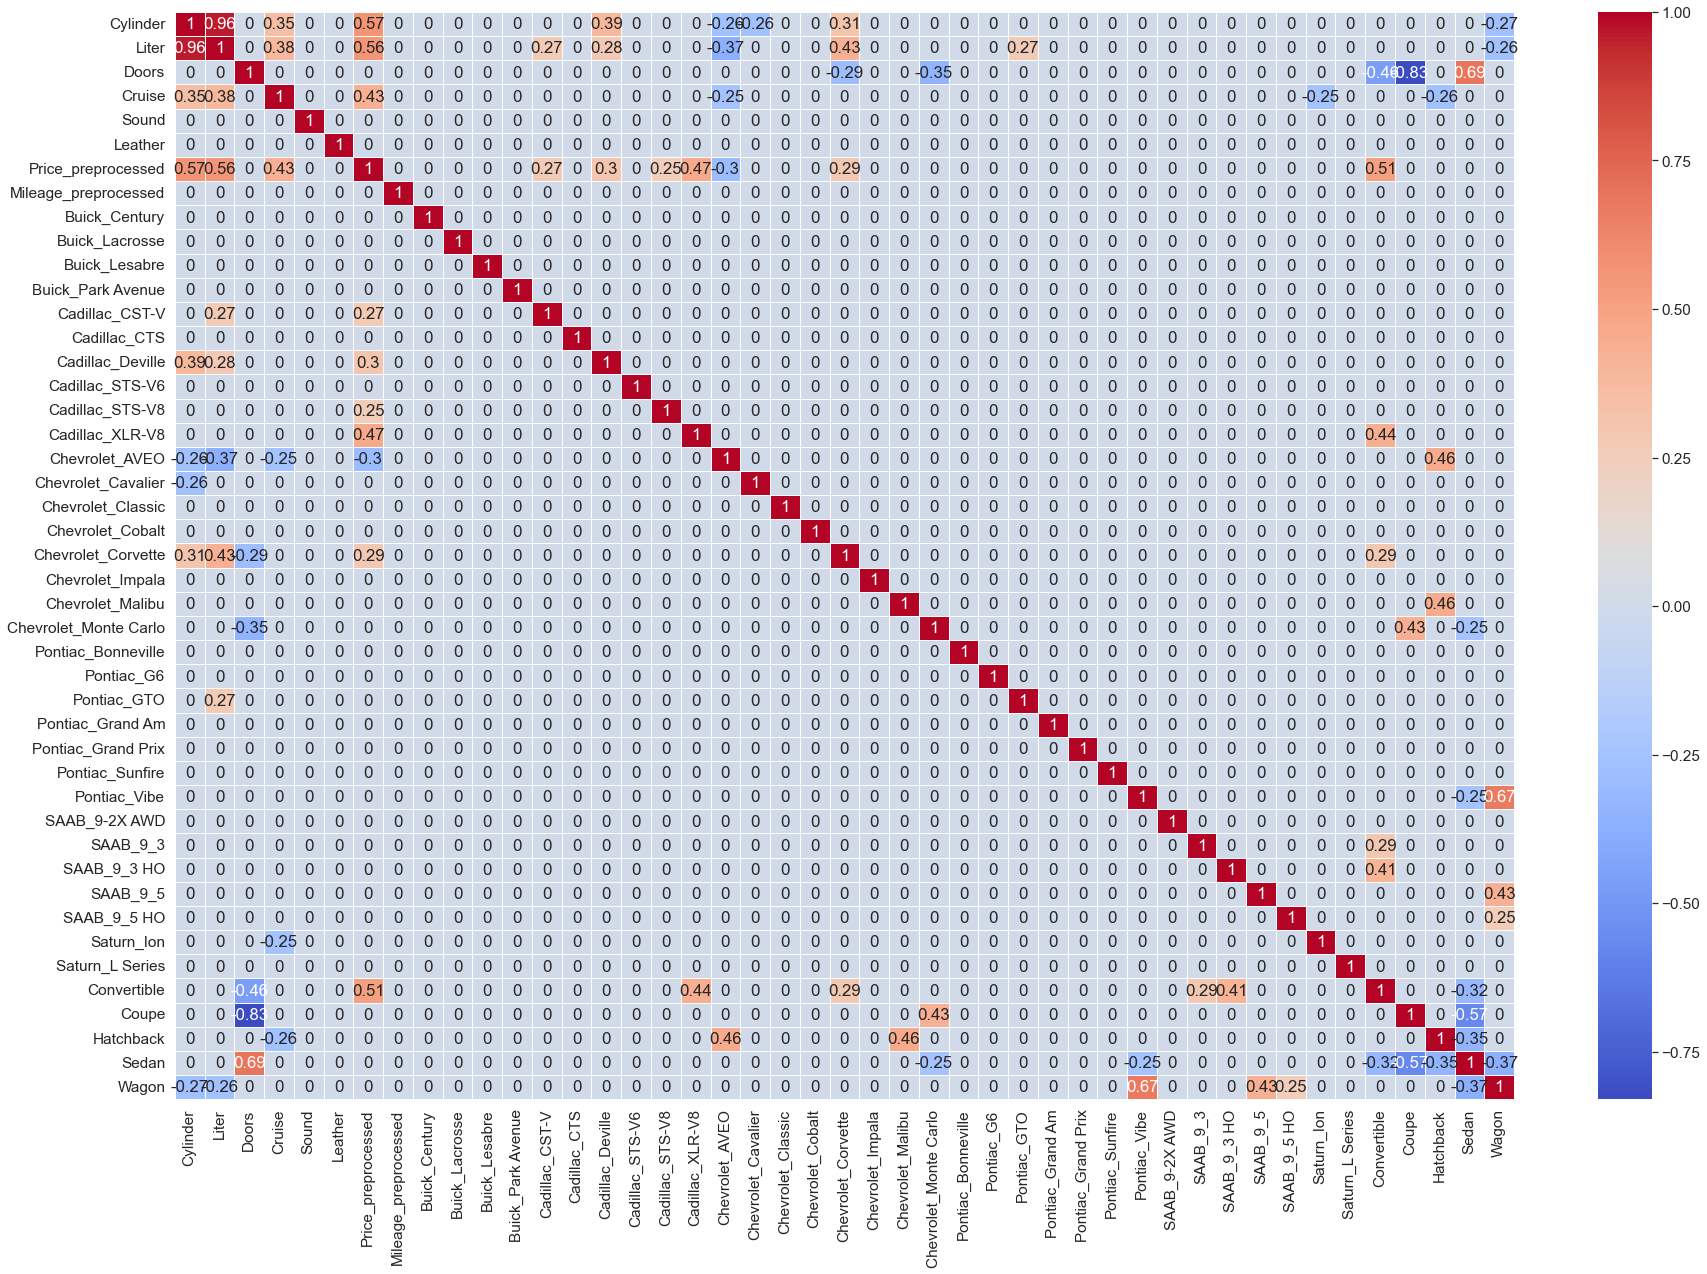

In [26]:
df_data_preprocessed_corr = df_data_preprocessed
df_data_preprocessed_corr = df_data_preprocessed_corr.corr()
df_data_preprocessed_corr = np.round(df_data_preprocessed_corr, 2)
df_data_preprocessed_corr[np.abs(df_data_preprocessed_corr) < 0.25] = 0

plt.figure(figsize = (30, 20))

sn.set(font_scale = 1.4)

sn.heatmap(data = df_data_preprocessed_corr, annot = True, cmap = 'coolwarm', linewidth = 0.5)

##### Анализ матрицы корреляций показывает, что целевая переменная "Price_preprocessed" имеет довольно сильную линейную зависимость с такими признаками как "Cylinder", "Liter", "Cruise" и "Convertible", что логично. Однако сильное влияние моделей авто вызывает подозрение.

##### Ввиду большого кол-ва признаков может потребоваться регуляризация.

## Model Building

##### Изначально планировал реализовать здесь кросс-валидацию, разбить данные на фолды, написать класс model-builder, однако:
##### 1. Лучше сперва посмотрю на лекции как это лучше сделать;
##### 2. Приберегу силы для финальной работы;
##### 3. Сделаю работу быстрее, так как сильно ограничен по времени =(.

In [27]:
X = df_data_preprocessed.drop(columns=['Price_preprocessed']).copy()
y = df_data_preprocessed['Price_preprocessed']

list_alpha = np.linspace(0, 1, 11)
params = {'alpha': list_alpha}
params

scorings = 'neg_mean_squared_error'

gs = GridSearchCV(estimator=Lasso(),
                 param_grid=params,
                 scoring=scorings, 
                  cv=4,
                 n_jobs=-1)

In [28]:
%%time

gs.fit(X, y)

Wall time: 962 ms


c:\users\sergeyz06\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.860e+08, tolerance: 7.844e+06
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=4, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

In [29]:
gs.best_estimator_

Lasso(alpha=0.7000000000000001)

In [30]:
%%time

y_pred = gs.predict(X)

Wall time: 1.99 ms


In [31]:
mean_squared_error(y, y_pred)

1911963.6697446909

In [32]:
mean_absolute_error(y, y_pred)

1043.9986401513822

## MAE = ~1044 при стоимостях авто от 10к до 70к.

##### Эксперимент, прогноз без учёта марок/моделей авто:

In [33]:
X = df_data_preprocessed[['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Mileage_preprocessed', 'Convertible', 'Coupe', 'Hatchback', 'Sedan', 'Wagon']].copy()

In [34]:
%%time

gs.fit(X, y)

Wall time: 70.8 ms


c:\users\sergeyz06\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
c:\users\sergeyz06\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\users\sergeyz06\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+10, tolerance: 7.844e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted 

GridSearchCV(cv=4, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

In [35]:
gs.best_estimator_

Lasso(alpha=0.0)

In [36]:
%%time

y_pred = gs.predict(X)

Wall time: 2 ms


In [37]:
mean_squared_error(y, y_pred)

30655738.0569565

In [38]:
mean_absolute_error(y, y_pred)

4259.313411584024

#### Вывод эксперимента - наличие ин-фы о марки/моделе авто значительно улучшает точность прогноза.